## Data exploration

This notebook focuses on exploration of data to be used for the homework.

In [1]:
import os
import numpy as np
import pandas as pd
from PIL import Image
from matplotlib import pyplot as plt

We are working with jpg images, then we are interested in 
* coherent dimensions
* coherent number of channels
* presence of target variable (only for training)

In [2]:
train_images_path = 'understanding_cloud_organization/train_images'
test_images_path = 'understanding_cloud_organization/test_images'

First we upload an image at random from the training folder to have in mind what we are treating.

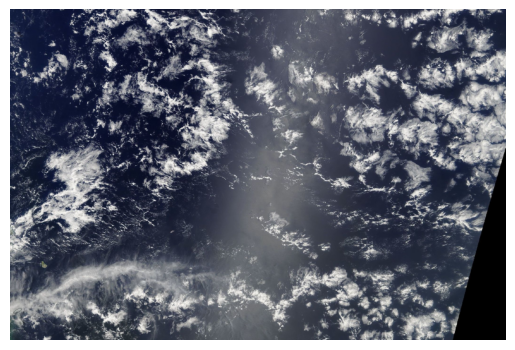

In [3]:
example_image = np.random.choice(os.listdir(train_images_path))
image = Image.open(os.path.join(train_images_path,example_image))
plt.imshow(image)
plt.axis('off')
plt.show()

Now, we can check that all the images have the same dimension.

In the dataset description, the dimensions reported are 1400x2100 pixels over 3 channels. We can check and eventually decide to drop or to rescale all the images to the smaller one.

In [4]:
min_width, min_height = float('inf'), float('inf')
max_width, max_height = 0, 0
channels = 3
counter_errors = 0

for image in os.listdir(train_images_path):
    with Image.open(os.path.join(train_images_path,image)) as image:
        width, height = image.size

        if width < min_width:
            min_width = width
        if height < min_height:
            min_height = height
        if width > max_width:
            max_width = width
        if height > max_height:
            max_height = height
        
        if np.array(image).shape[2] != channels:
            counter_errors += 1


print("Minimum width:", min_width)
print("Maximum width:", max_width)
print("Minimum height:", min_height)
print("Maximum height.", max_height)
print("Number of images with number of channels different than 3:", counter_errors)

Minimum width: 2100
Maximum width: 2100
Minimum height: 1400
Maximum height. 1400
Number of images with number of channels different than 3: 0


Since min and max width are the same, and min and max height are the same, we can confirm that all the images are 1400x2100 pizels. Also, all the images are RGB.

Note that in any case, when loading the data to feed the architecture, the images will be transformed with a resize of 0.25, to be compliant with the kaggle challenge request but also to meet system necessities.

Finally, we can check that all the images in the training folder are actually associated with a ground truth in the dedicated csv.

In [5]:
train_csv = pd.read_csv('understanding_cloud_organization/train.csv')
train_csv["Img_Namejpg"] = train_csv["Image_Label"].apply(lambda x: x.split("_")[0])
names_in_csv = set(train_csv["Img_Namejpg"])

print("All the images have a gt:", names_in_csv == set(os.listdir(train_images_path)))

All the images have a gt: True


The list of names coincide.

At this point, we can apply the same analysis for the test set (except for the graound truth).

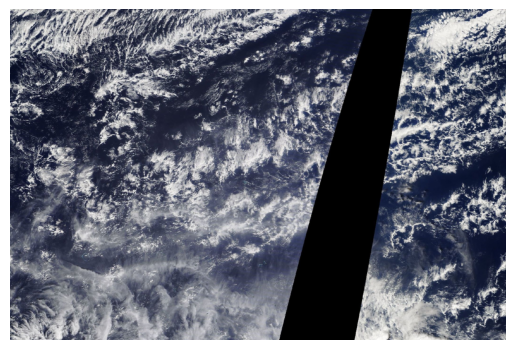

In [6]:
example_image = np.random.choice(os.listdir(test_images_path))
image = Image.open(os.path.join(test_images_path,example_image))
plt.imshow(image)
plt.axis('off')
plt.show()

In [7]:
min_width, min_height = float('inf'), float('inf')
max_width, max_height = 0, 0
channels = 3
counter_errors = 0

for image in os.listdir(test_images_path):
    with Image.open(os.path.join(test_images_path,image)) as image:
        width, height = image.size

        if width < min_width:
            min_width = width
        if height < min_height:
            min_height = height
        if width > max_width:
            max_width = width
        if height > max_height:
            max_height = height
        
        if np.array(image).shape[2] != channels:
            counter_errors += 1


print("Minimum width:", min_width)
print("Maximum width:", max_width)
print("Minimum height:", min_height)
print("Maximum height.", max_height)
print("Number of images with number of channels different than 3:", counter_errors)

Minimum width: 2100
Maximum width: 2100
Minimum height: 1400
Maximum height. 1400
Number of images with number of channels different than 3: 0
